## Assignment

Use the code below as building blocks to "connect the 2D dots" (i.e, reconstruct piecewise linear curves) using the 2D version of the Crust algorithm discussed in class. 

The code generates data points that form two concentric circles. You can control the number of points on the circles with the parameter `n`. Answer the following questinos:
- What is the feature size of the original geometry (the two circles)? 
- What value of `n` is necessary to correctly connect the dots, based on the theory from the class? 
- Try out different `n`-values in practice. Do the results match the theory? State your observations.

In [8]:
import scipy.spatial as spt
import numpy as np
import meshplot as mp
import matplotlib.pyplot as plt
import matplotlib.collections as pc

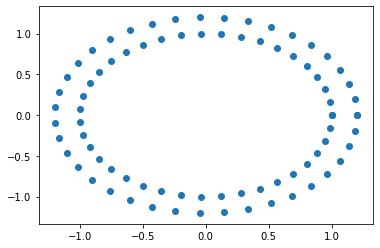

In [9]:
# data points consisting of two circular rings
n = 40
angles = np.linspace(0,2*np.pi, n)

r0 = 1
r1 = 1.2
x0 = np.cos(angles)*r0
y0 = np.sin(angles)*r0
x1 = np.cos(angles)*r1
y1 = np.sin(angles)*r1
x = np.concatenate((x0,x1))
y = np.concatenate((y0,y1))

plt.scatter(x,y)

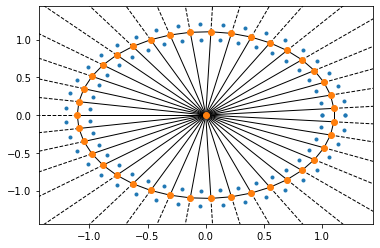

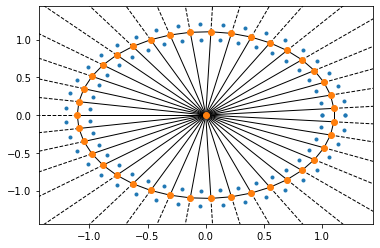

In [10]:
# Voronoi diagram of data points
vor = spt.Voronoi(np.column_stack((x,y)))
spt.voronoi_plot_2d(vor)

### Building blocks

Some code that will be useful to build the Crust algorithm.

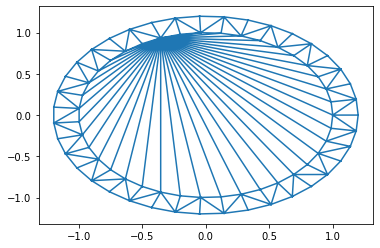

In [11]:
# Delaunay triangulation of data points
tri = spt.Delaunay(np.column_stack((x,y)))

plt.triplot(x, y, tri.simplices.copy())

In [15]:
def line_segments(simplices, vertices):
    """ 
    extract line segments from a set of simplices (i.e., triangles in 2D)
  
    Parameters: 
    arg1: set of simplices, i.e., indices of triangle vertices
    arg2: vertex positions (x,y coordinates)
    
    Returns: 
    np.array: line segments consisting of start and end points, in format suitable for matplotlib.collections.LineCollection
  
    """
    # lists for x,y coordinates of start and end points of line segments
    xp = []
    yp = []

    # traverse all Delaunay simplices
    for simplex in simplices:
        for i in [0, 1, 2]:
            # start point at vertex i of current Delaunay simplex
            xp.append(vertices[simplex[i]][0])
            yp.append(vertices[simplex[i]][1])
            # end point at vertex (i+1)%3 of current Delaunay simplex
            xp.append(vertices[simplex[(i+1)%3]][0])
            yp.append(vertices[simplex[(i+1)%3]][1])

    # reshape line segments into appropriate format for pc.LineCollection             
    segs = np.stack( (np.reshape(xp,(int(len(xp)/2),2)), np.reshape(yp,(int(len(yp)/2),2))), 2)
    
    return segs

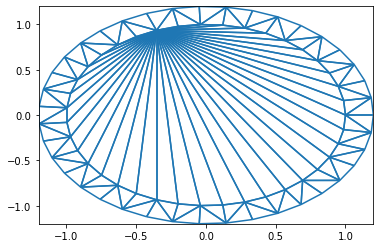

In [16]:
# you will need to extract the edges (line segments) from the Delaunay triangulation
# this function helps you do it
segs = line_segments(tri.simplices, np.column_stack((x,y)))

# plot the line segments
lines = pc.LineCollection(segs)
fig, ax = plt.subplots()
ax.add_collection(lines)
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

### Your solution

In [14]:
# your Crust algorithm here
# hint: change the line_segments function to allow you to extract only the line segments that are part of the Crust

